<a href="https://colab.research.google.com/github/vimesh630/ML_CW/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and Google Drive Mounting

In [8]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Preprocessed Data

In [9]:
# Load preprocessed data
train_data_path = '/content/drive/My Drive/ML Coursework/Preprocessed Dataset/X_train.csv'
test_data_path = '/content/drive/My Drive/ML Coursework/Preprocessed Dataset/X_test.csv'

y_train_path = '/content/drive/My Drive/ML Coursework/Preprocessed Dataset/y_train.csv'
y_test_path = '/content/drive/My Drive/ML Coursework/Preprocessed Dataset/y_test.csv'

# Load data
X_train = pd.read_csv(train_data_path).values
X_test = pd.read_csv(test_data_path).values
y_train = pd.read_csv(y_train_path).values.ravel()
y_test = pd.read_csv(y_test_path).values.ravel()

X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

Define and Compile the Neural Network Model

In [10]:
# Define the neural network model
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),  # Input layer + Hidden layer 1
    BatchNormalization(),
    Dropout(0.4),                                              # Dropout for regularization
    Dense(128, activation='relu'),                             # Hidden layer 2
    BatchNormalization(),
    Dropout(0.3),                                              # Dropout for regularization
    Dense(64, activation='relu'),                              # Hidden layer 3
    Dense(1, activation='sigmoid')                             # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the Model

In [11]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,      # Use 20% of training data for validation
                    verbose=1)                 # Display training progress

Epoch 1/20
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8569 - loss: 0.3333 - val_accuracy: 0.9042 - val_loss: 0.2353
Epoch 2/20
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8953 - loss: 0.2593 - val_accuracy: 0.9071 - val_loss: 0.2219
Epoch 3/20
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9019 - loss: 0.2422 - val_accuracy: 0.9112 - val_loss: 0.2124
Epoch 4/20
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9039 - loss: 0.2350 - val_accuracy: 0.9143 - val_loss: 0.2076
Epoch 5/20
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9085 - loss: 0.2249 - val_accuracy: 0.9149 - val_loss: 0.2038
Epoch 6/20
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9097 - loss: 0.2196 - val_accuracy: 0.9163 - val_loss: 0.2004
Epoch 7/20
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9148 - loss: 0.2143 - val_accuracy: 0.9191 - val_loss: 0.1922
Epoch 8/20
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9130 - loss: 0.2136 -

Evaluate the Model and Save Results

In [12]:
import json

# Predict and evaluate performance
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()

# Calculate accuracies
train_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]
test_accuracy = (y_test == y_pred).mean()

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification Report
classification_report_dict = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred).tolist()
print("\nConfusion Matrix:")
print(conf_matrix)

# ROC-AUC Score
y_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Prepare Neural Network results dictionary
nn_results = {
    "model_type": "Neural Network",
    "training_accuracy": train_accuracy,
    "validation_accuracy": validation_accuracy,
    "test_accuracy": test_accuracy,
    "roc_auc": roc_auc,
    "classification_report": classification_report_dict,
    "confusion_matrix": conf_matrix,
    "roc_curve": {
        "fpr": fpr.tolist(),
        "tpr": tpr.tolist(),
        "thresholds": thresholds.tolist()
    }
}

# Save results as JSON
output_path = '/content/drive/My Drive/ML Coursework/Model_Results/nn_results.json'
with open(output_path, 'w') as f:
    json.dump(nn_results, f, indent=4)

print(f"Neural Network results saved to: {output_path}")

503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Accuracy: 0.9253
Validation Accuracy: 0.9268
Test Accuracy: 0.9286

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.93      8015
         1.0       0.90      0.97      0.93      8072

    accuracy                           0.93     16087
   macro avg       0.93      0.93      0.93     16087
weighted avg       0.93      0.93      0.93     16087


Confusion Matrix:
[[7135, 880], [269, 7803]]
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Neural Network results saved to: /content/drive/My Drive/ML Coursework/Model_Results/nn_results.json


# Visualizations

Training and Validation Accuracy/Loss

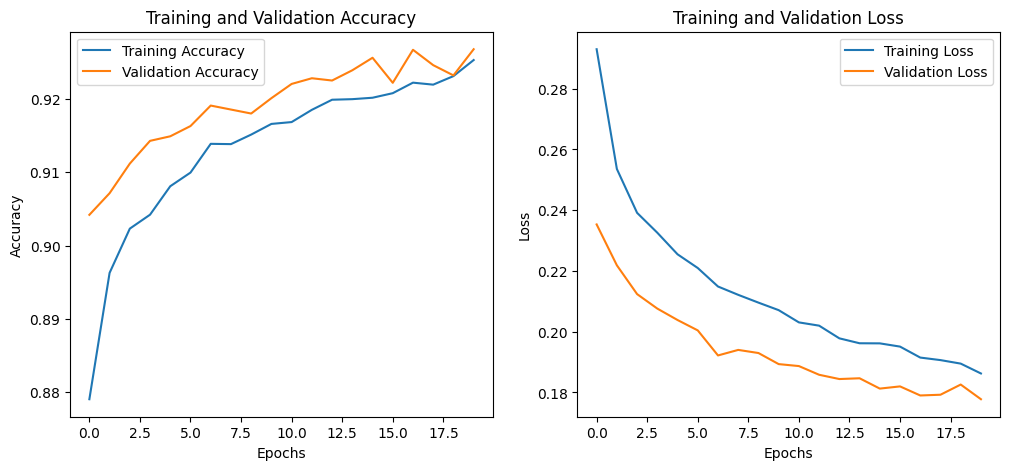

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Confusion Matrix

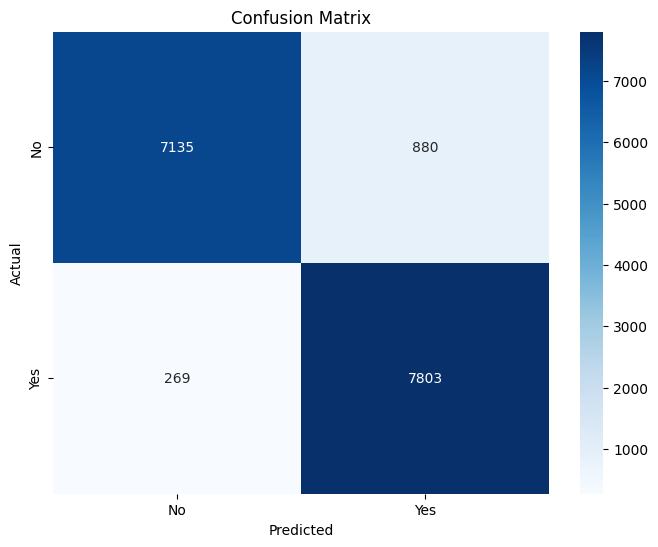

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ROC Curve

503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


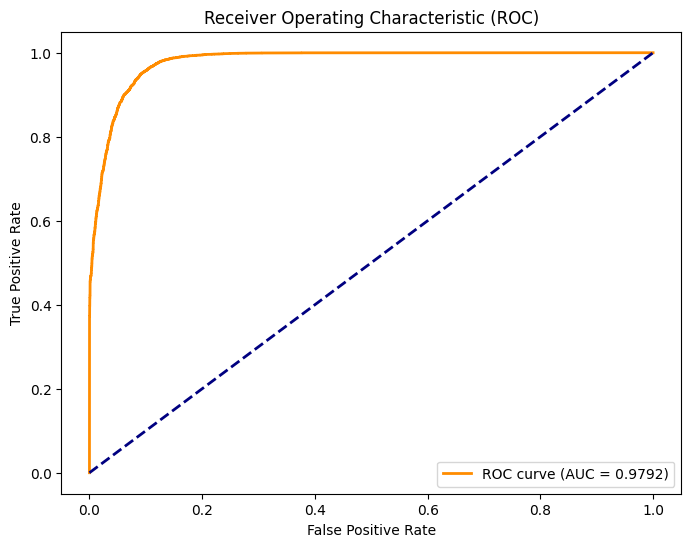

In [15]:
y_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Precision-Recall Curve

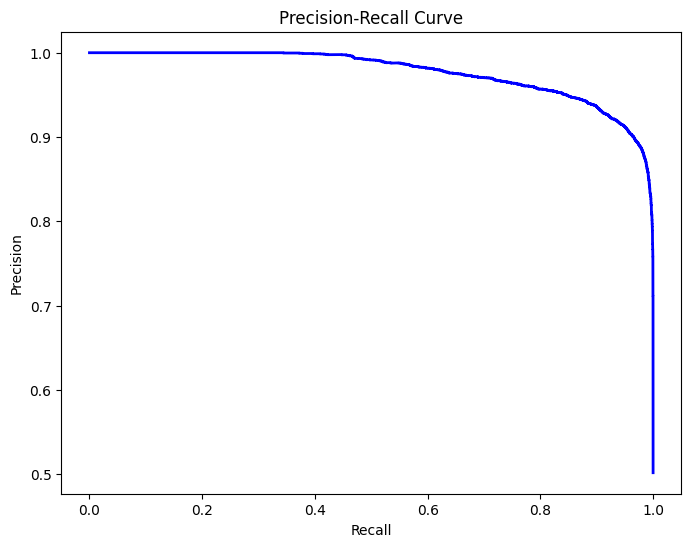

In [16]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Predictions for Sample Clients

In [17]:
# Predict probabilities for sample clients
sample_clients = X_test[:10]
predicted_probabilities = model.predict(sample_clients)
predicted_classes = (predicted_probabilities > 0.5).astype("int32")

print("Predicted Probabilities:\n", predicted_probabilities)
print("Predicted Classes (0 = No, 1 = Yes):\n", predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Probabilities:
 [[1.4706234e-03]
 [6.0647052e-02]
 [8.6757803e-01]
 [9.8165482e-01]
 [8.8431343e-06]
 [9.9998945e-01]
 [9.6512491e-01]
 [9.1075796e-01]
 [4.9531534e-03]
 [3.0785552e-01]]
Predicted Classes (0 = No, 1 = Yes):
 [[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]
